In [2]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

## Introduction:
Any data point/observation that deviates significantly from the other observations is called an Anomaly/Outlier. Anomaly detection is important and finds its application in various domains like detection of fraudulent bank transactions, network intrusion detection, sudden rise/drop in sales, change in customer behavior, etc.

Many techniques were developed to detect anomalies in the data. In this article, we will look at the implementation of Isolation Forests – an unsupervised anomaly detection technique.

## Isolation Forests
Isolation Forests(IF), similar to Random Forests, are build based on decision trees. And since there are no pre-defined labels here, it is an unsupervised model.

IsolationForests were built based on the fact that anomalies are the data points that are “few and different”.

In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations.

Let’s take a deeper look at how this actually works.

### How do Isolation Forests work?
As mentioned earlier, Isolation Forests are nothing but an ensemble of binary decision trees. And each tree in an Isolation Forest is called an Isolation Tree(iTree). The algorithm starts with the training of the data, by generating Isolation Trees.

Let us look at the complete algorithm step by step:

- When given a dataset, a random sub-sample of the data is selected and assigned to a binary tree.
- Branching of the tree starts by selecting a random feature (from the set of all N features) first. And then branching is done on a random threshold ( any value in the range of minimum and maximum values of the selected feature).
- If the value of a data point is less than the selected threshold, it goes to the left branch else to the right. And thus a node is split into left and right branches.
- This process from step 2 is continued recursively till each data point is completely isolated or till max depth(if defined) is reached.
- The above steps are repeated to construct random binary trees.



After an ensemble of iTrees(Isolation Forest) is created, model training is complete. During scoring, a data point is traversed through all the trees which were trained earlier. Now, an ‘anomaly score’ is assigned to each of the data points based on the depth of the tree required to arrive at that point. This score is an aggregation of the depth obtained from each of the iTrees. An anomaly score of -1 is assigned to anomalies and 1 to normal points based on the contamination(percentage of anomalies present in the data) parameter provided.

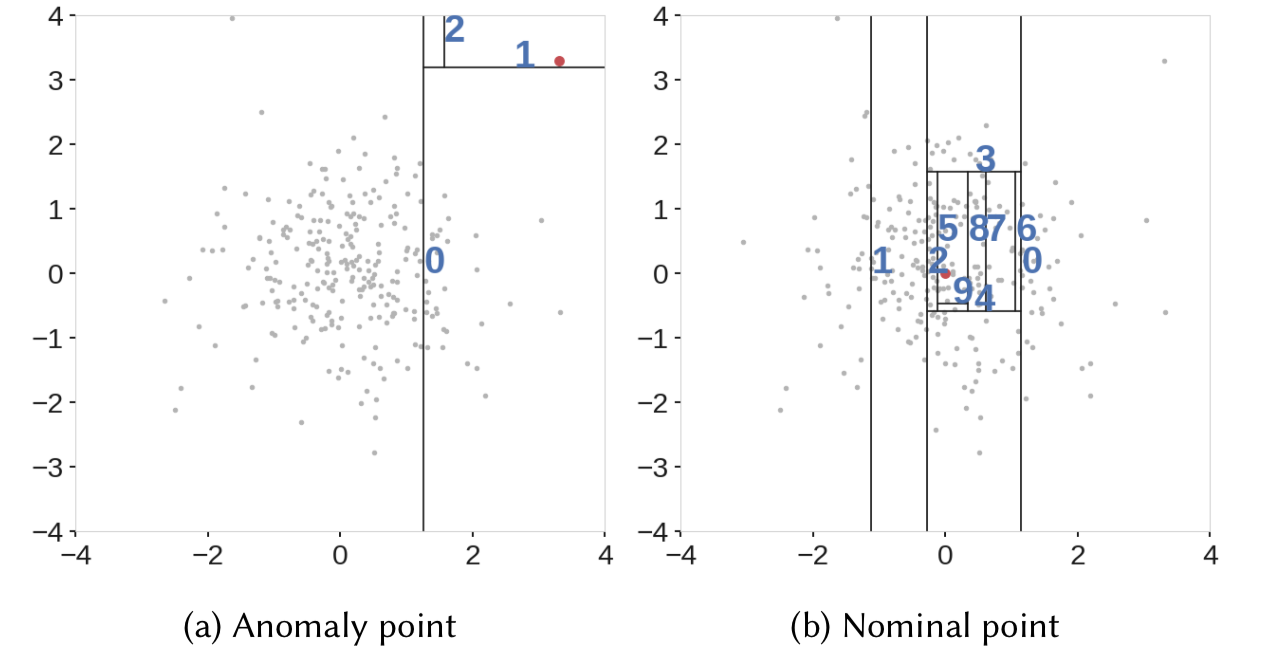

### Limitations of Isolation Forest:
Isolation Forests are computationally efficient and
have been proven to be very effective in Anomaly detection. Despite its advantages, there are a few limitations as mentioned below.

The final anomaly score depends on the contamination parameter, provided while training the model. This implies that we should have an idea of what percentage of the data is anomalous beforehand to get a better prediction.
Also, the model suffers from a bias due to the way the branching takes place.
Well, to understand the second point, we can take a look at the below anomaly score map.

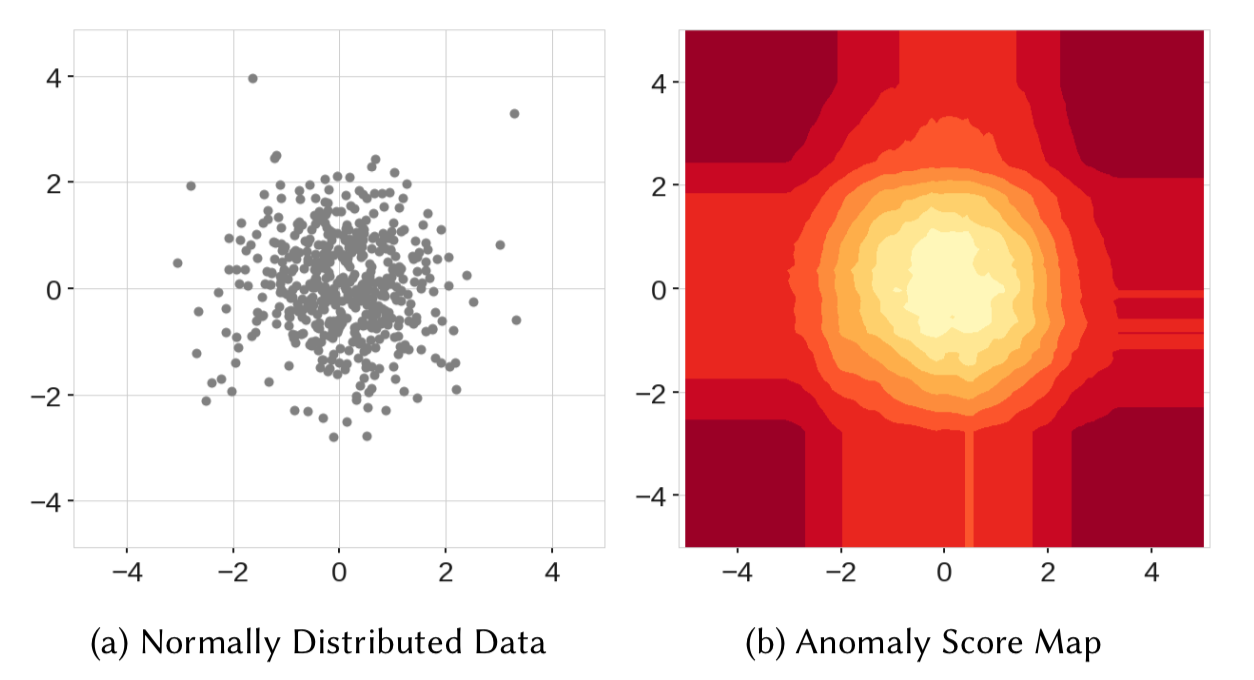

Here, in the score map on the right, we can see that the points in the center got the lowest anomaly score, which is expected. However, we can see four rectangular regions around the circle with lower anomaly scores as well. So, when a new data point in any of these rectangular regions is scored, it might not be detected as an anomaly.

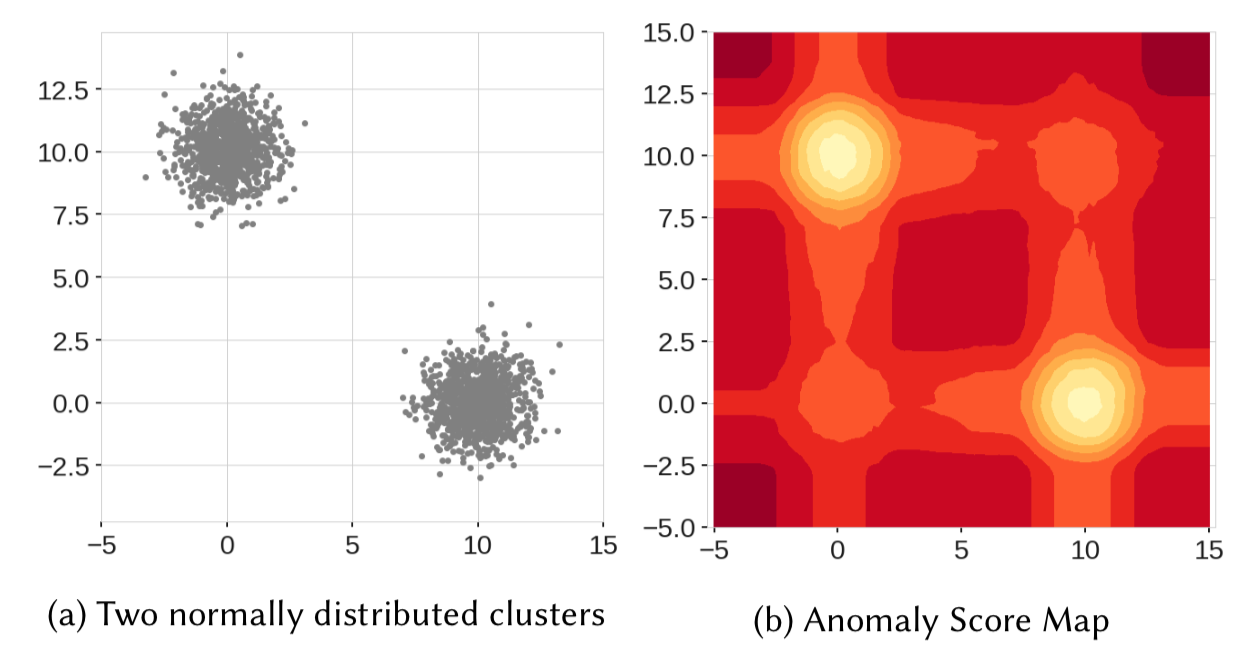

Similarly, in the above figure, we can see that the model resulted in two additional blobs(on the top right and bottom left ) which never even existed in the data.

Whenever a node in an iTree is split based on a threshold value, the data is split into left and right branches resulting in horizontal and vertical branch cuts. And these branch cuts result in this model bias.

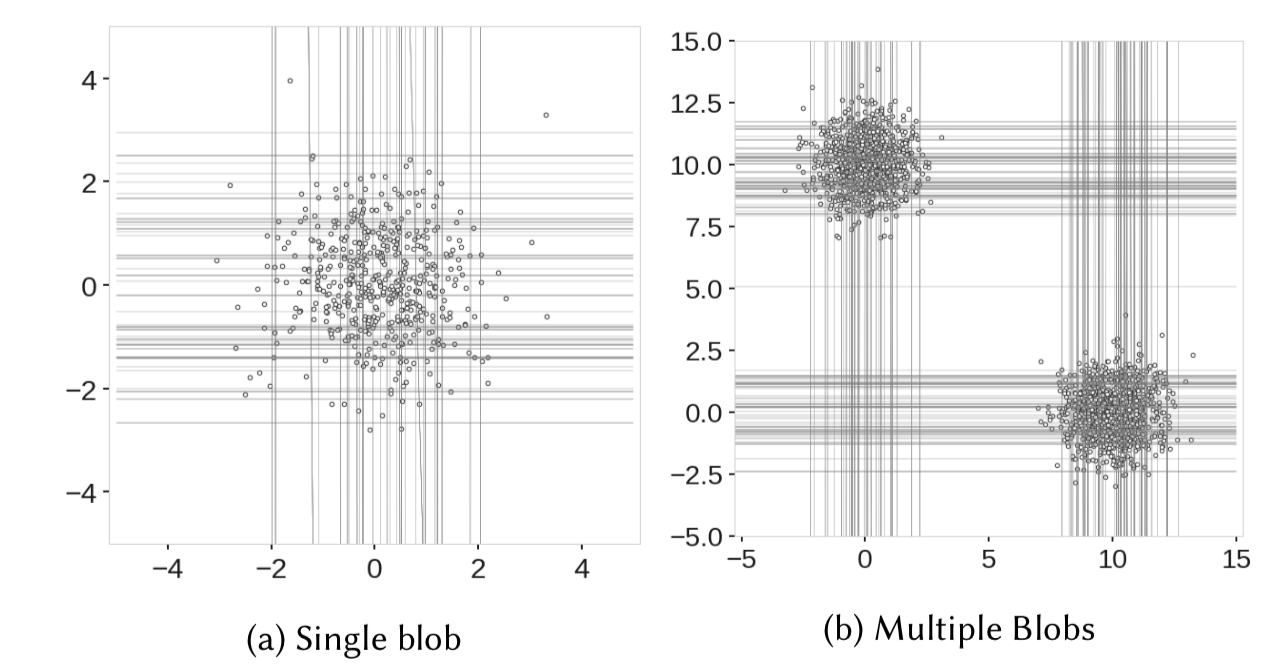

The above figure shows branch cuts after combining outputs of all the trees of an Isolation Forest. Here we can see how the rectangular regions with lower anomaly scores were formed in the left figure. And also the right figure shows the formation of two additional blobs due to more branch cuts.

To overcome this limit, an extension to Isolation Forests called ‘Extended Isolation Forests’ was introduced by Sahand Hariri. In EIF, horizontal and vertical cuts were replaced with cuts with random slopes.

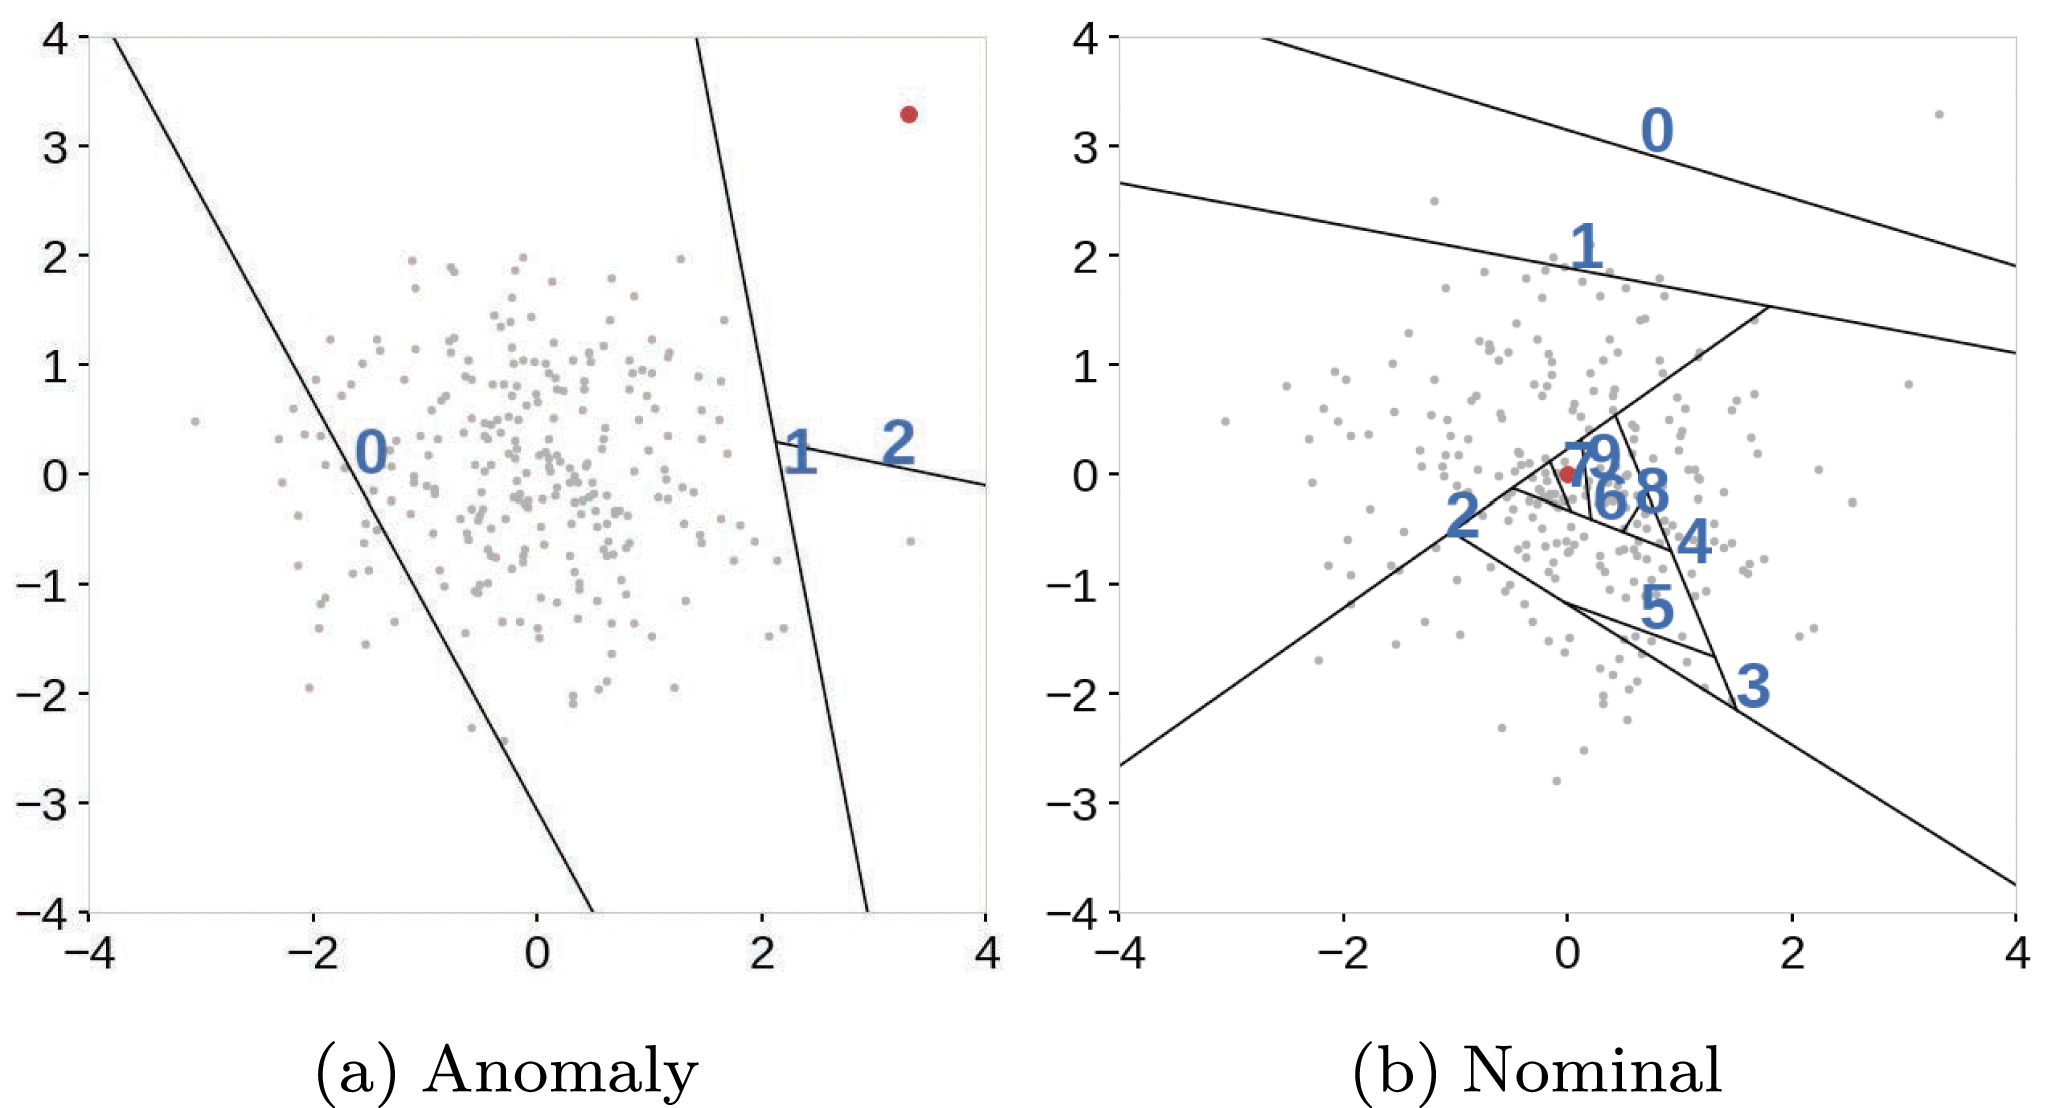

Though EIF was introduced, Isolation Forests are still widely used in various fields for Anamoly detection.

#### To download the dataset<a href='https://drive.google.com/file/d/1Kino_omr1RbSqe58SsAf3qHr8mCbAsjz/view?usp=sharing' title='Google Drive'> Click here

In [24]:
df = pd.read_csv('datasets/scaled_data.csv')

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [26]:
df.shape

(768, 9)

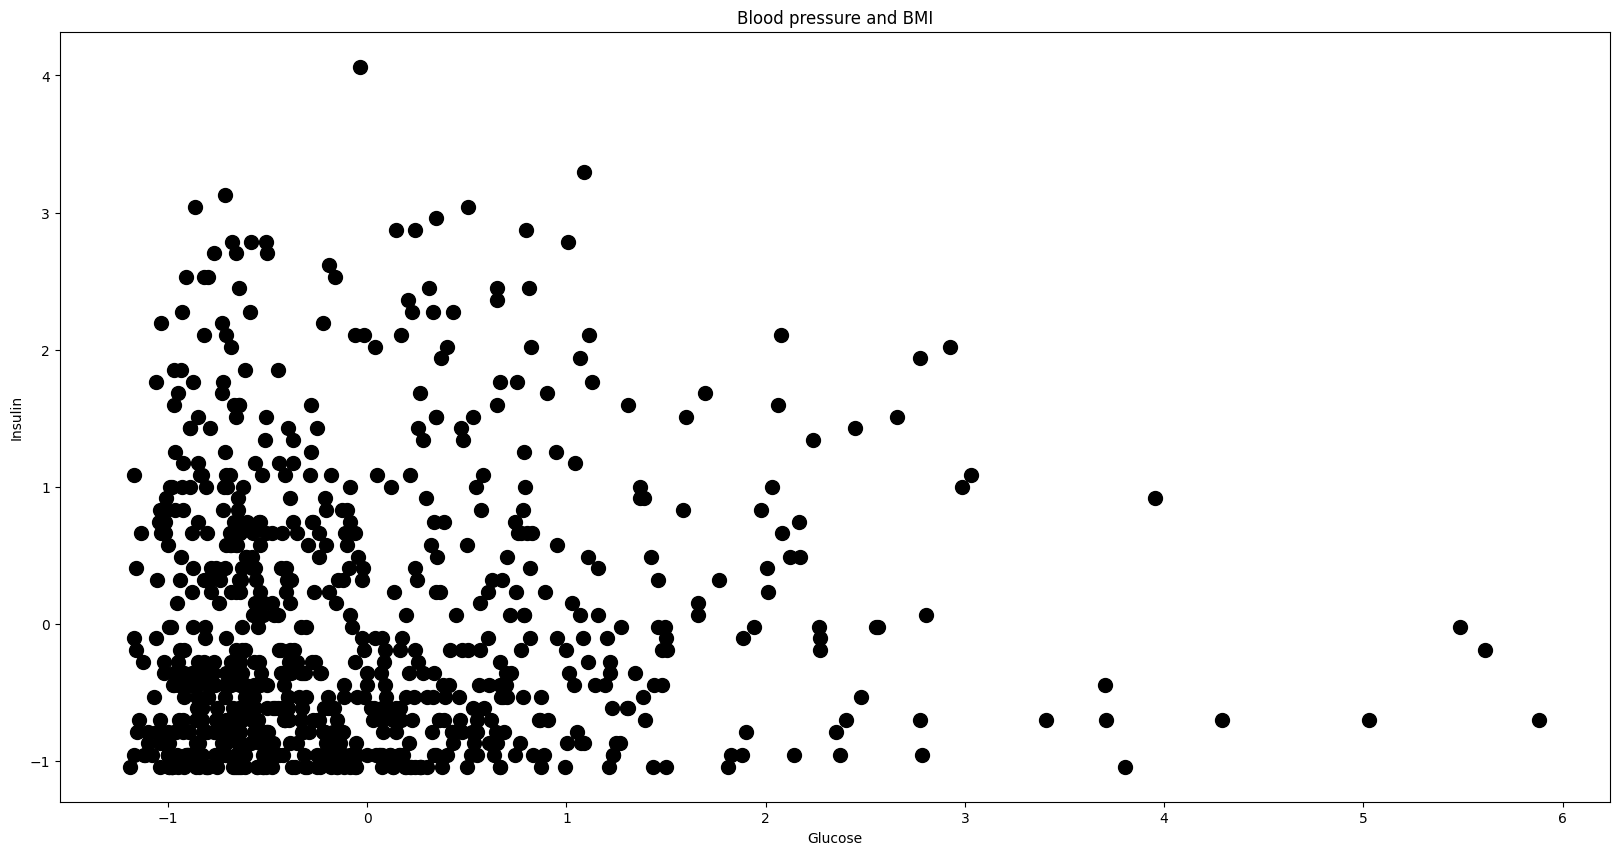

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(df['DiabetesPedigreeFunction'],
            df['Age'],
            color='black',
            s=100)

ax.set(xlabel='Glucose', ylabel='Insulin', title='Blood pressure and BMI')
plt.show();

In [28]:
X = df[:-1]

In [29]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [30]:

isf = IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=7, verbose = 1)

In [31]:
isf.fit(X[['SkinThickness']])

print(isf.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 7, 'verbose': 1, 'warm_start': False}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [32]:
X['scores'] = isf.decision_function(X[['SkinThickness']])

X['anomaly_score'] = isf.predict(X[['SkinThickness']])

X[X['anomaly_score']==-1].head()

/var/folders/01/y789mnz55p161vf4sjd5zj5h0000gn/T/ipykernel_56360/2116379243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['scores'] = isf.decision_function(X[['SkinThickness']])
/var/folders/01/y789mnz55p161vf4sjd5zj5h0000gn/T/ipykernel_56360/2116379243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['anomaly_score'] = isf.predict(X[['SkinThickness']])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,scores,anomaly_score
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259,1,-0.064497,-1
16,-1.141852,-0.090591,0.770014,1.660007,1.304175,1.752428,0.238963,-0.190672,1,-0.094758,-1
18,-0.844885,-0.560048,-2.021665,1.095454,0.027790,1.435129,-0.872441,-0.020496,0,-0.023683,-1
27,-0.844885,-0.747831,-0.160546,-0.347291,0.522715,-1.115947,0.045675,-0.956462,0,-0.015800,-1
32,-0.250952,-1.029505,-0.574128,-0.598204,-0.224014,-0.912877,-0.618751,-0.956462,0,-0.085680,-1


#-1 indicates outliers, 1 indicates inliers data

In [40]:
X['anomaly_score']

0      1
1      1
2      1
3      1
4      1
      ..
762    1
763   -1
764    1
765    1
766    1
Name: anomaly_score, Length: 767, dtype: int64

In [41]:
#not sure why the size of them are not equial. So, I added one more value to y_pred
n_outliers = (X['anomaly_score'] == -1).sum()
n_outliers

143

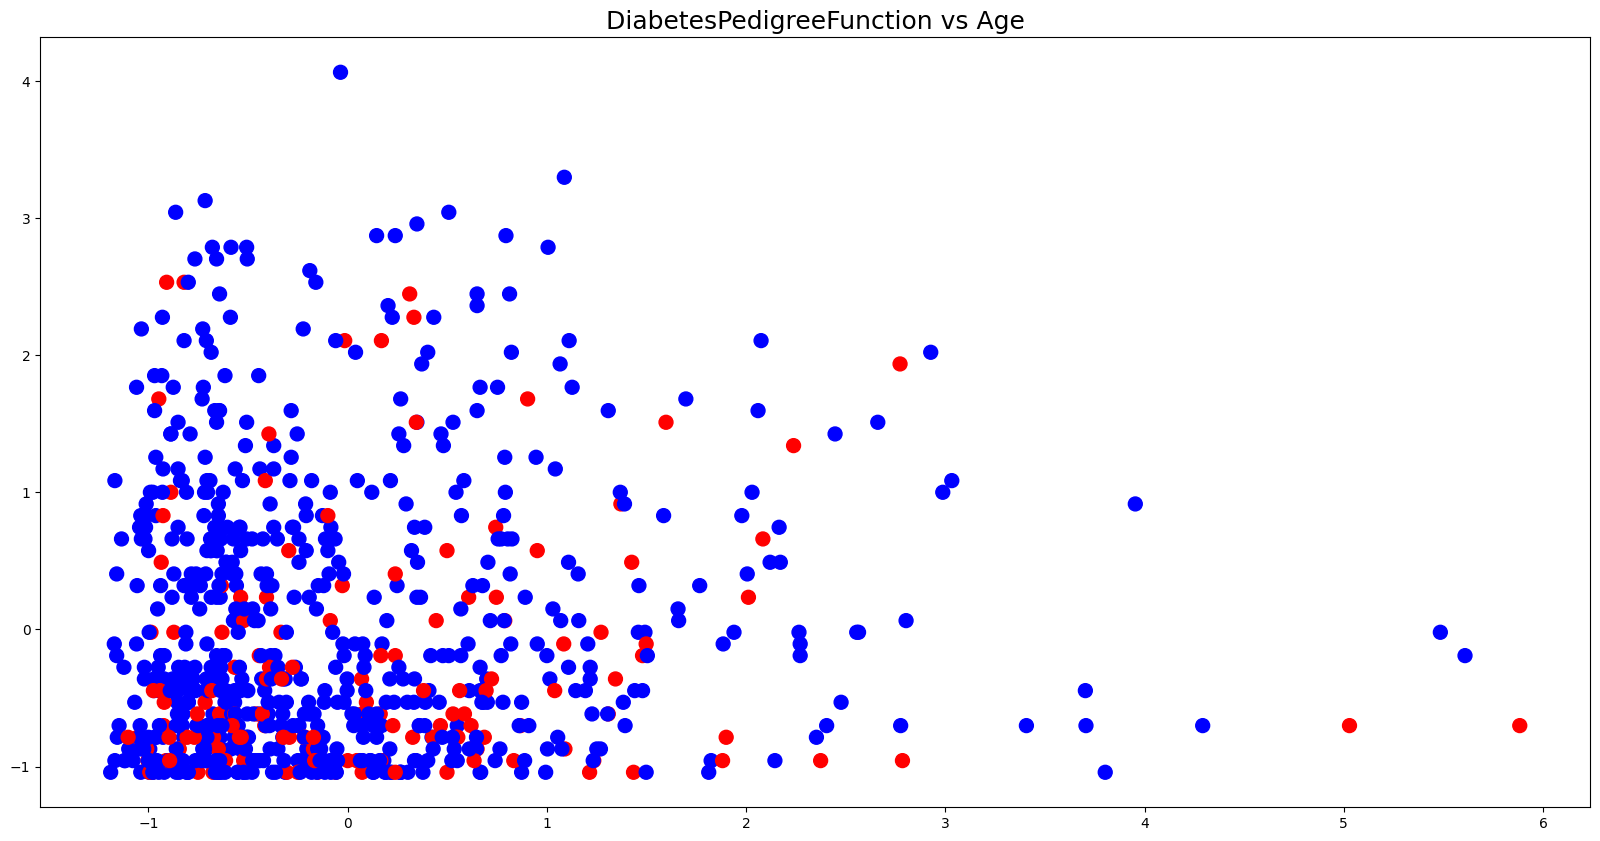

In [43]:
colors = np.array(['r','b'])

plt.figure(figsize=(20,10))

plt.title("DiabetesPedigreeFunction vs Age", size=18)

plt.scatter(X['DiabetesPedigreeFunction'],
            X['Age'],
            color=colors[(X['anomaly_score']+1) // 2 ],
            s=100)

plt.show();